

* 1 large sparse graph with ER model (no node with degree 0).
* Select few nodes in the ER graph, take this small graph and replace it with BA model graph.


In [1]:
import sys
sys.path.append("..")

import networkx as nx
import matplotlib.pyplot as plt
import logging
from src.graphgen.er_graph_with_ba_subgraph import *

In [2]:
# Configure logging # Adjust the logging level as needed
logging.basicConfig(filename='graphGen_log.log', level=logging.INFO, force=True)
# force will rerun logging.basicConfig, otherwise its subsequent calls are ignored

Graph created successfully!


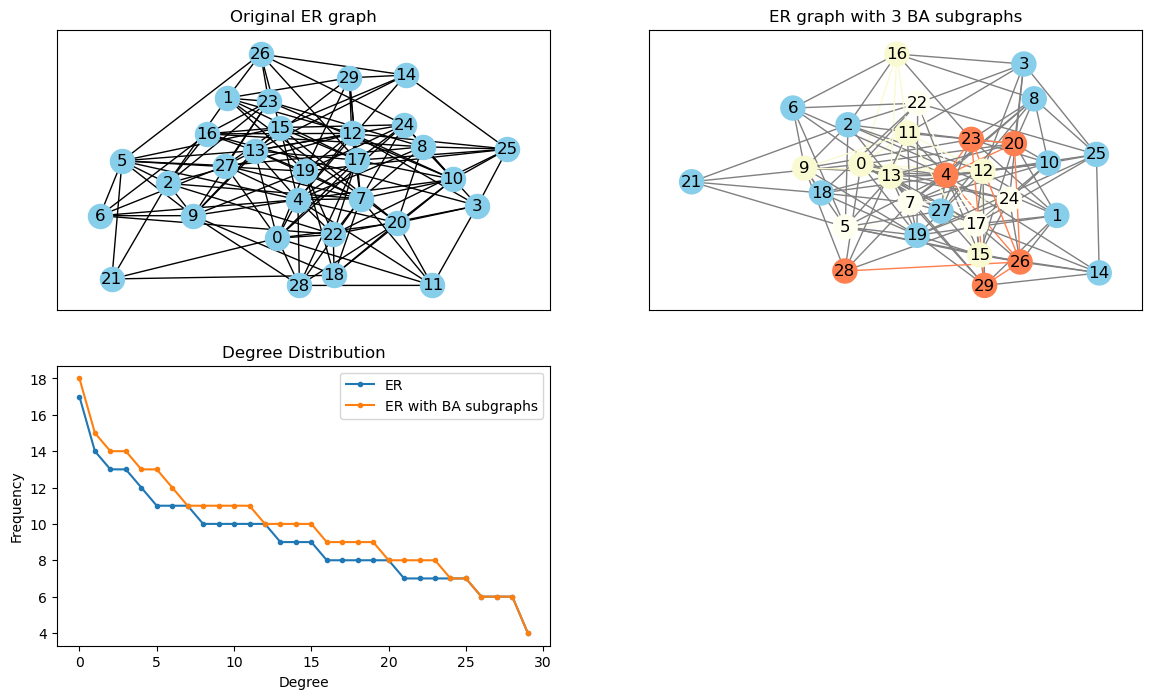

In [6]:

result_adjacency = create_er_replace_with_ba_adjacency(
    n=30,
    p=0.3,
    m=3,
    min_motif_size=5,
    max_motif_size=8,
    min_num_motifs=2,
    max_num_motifs=3,
    motif_overlap=False,
    min_base_edge_weight=1.0,
    max_base_edge_weight=1.0,
    min_motif_edge_weight=1.0,
    max_motif_edge_weight=1.0,
    plot=True,
    log=True
)
if result_adjacency is not None:
    print("Graph created successfully!")
else:
    print("Graph creation failed.")


Graph created successfully!


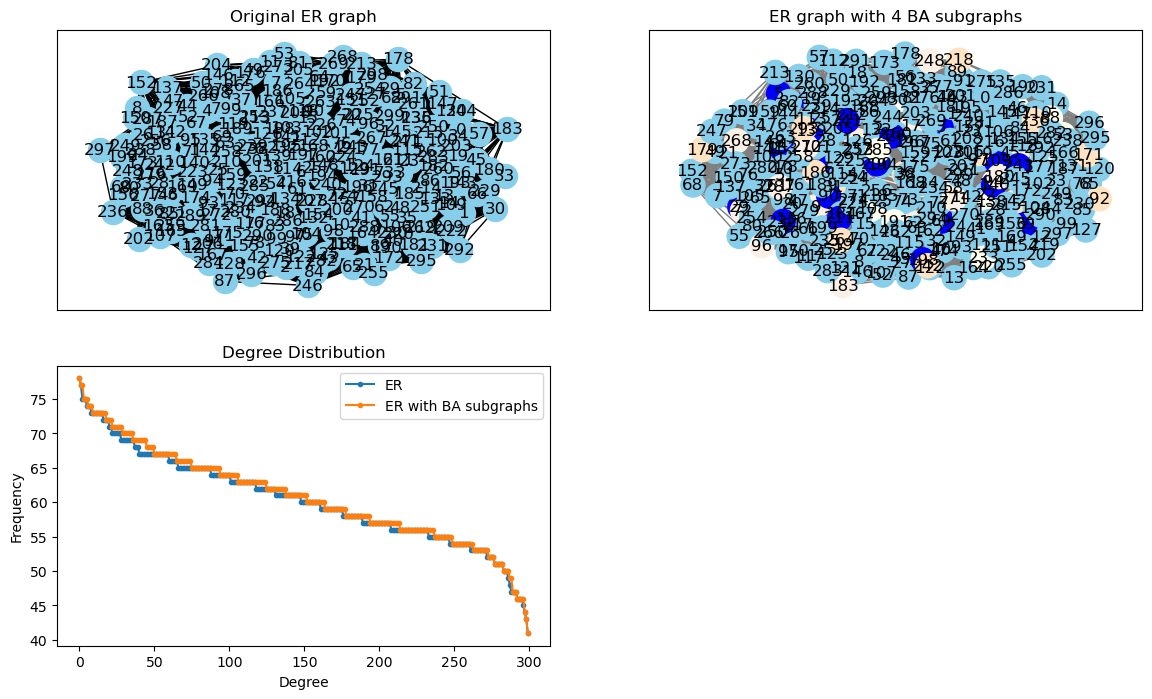

In [3]:
result_adjacency = create_er_replace_with_ba_adjacency(
    n=300,
    p=0.2,
    m=3,
    min_motif_size=10,
    max_motif_size=30,
    min_num_motifs=3,
    max_num_motifs=5,
    motif_overlap=False,
    min_base_edge_weight=1.0,
    max_base_edge_weight=1.0,
    min_motif_edge_weight=1.0,
    max_motif_edge_weight=1.0,
    plot=True,
    log=True
)
if result_adjacency is not None:
    print("Graph created successfully!")
else:
    print("Graph creation failed.")